## Make sure DVC pipeline is up to date
Only interested in the stage named 'prepare', since that one downloads the dataset and transforms it to .csv files.

In [1]:
!dvc repro ../dvc.yaml:prepare

Stage '../dvc.yaml:prepare' didn't change, skipping                   core>
Data and pipelines are up to date.


## Add visualizations of raw data

In [2]:
import pandas as pd

filepath = '../data/interim/mnist_test.csv'
labels = {
    0: 't_shirt_top',
    1: 'trouser',
    2: 'pullover',
    3: 'dress',
    4: 'coat',
    5: 'sandal',
    6: 'shirt',
    7: 'sneaker',
    8: 'bag',
    9: 'ankle_boots'
}

df = pd.read_csv(filepath, header=None).rename(columns={0: "label_num"})
df.insert(loc=0, column="label", value=df["label_num"].map(labels))
print(df.shape)
df.head(5)

(10000, 786)


,label,label_num,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,ankle_boots,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,pullover,2,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,trouser,1,0,0,0,0,0,0,0,0,...,164,58,0,0,0,0,0,0,0,0
3,trouser,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,shirt,6,0,0,0,2,0,1,1,0,...,71,12,0,0,0,0,0,0,0,0


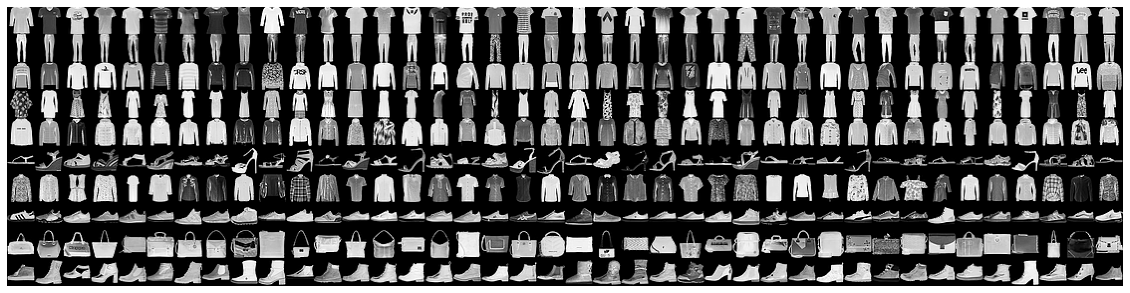

In [3]:
import numpy as np
import matplotlib.pyplot as plt

img_per_label = 40
img_size = 28

samples = df.groupby(["label_num"]).head(img_per_label).sort_values(["label_num"])
samples = samples.drop(columns=["label","label_num"])
samples = samples.to_numpy()

image = np.ones((img_size * 10, img_size * img_per_label))

for i in range(img_per_label):
    for j in range(img_per_label):
        offset = i * img_per_label + j
        if offset < img_per_label*len(labels):
            image[i*img_size:(i+1)*img_size, j*img_size:(j+1)*img_size] = np.reshape(samples[offset], (img_size,img_size))
            
plt.figure(figsize=(20, 40))
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.show()